In [13]:
""" Predict-housing-prices.py

    This Python script predicts the housing prices based on some parameters

    Author: G00Z-G00Z
    Contact: edygomezgg4@gmail.com
    First created: Thu 22 Sep, 2022
"""


' Predict-housing-prices.py\n\n    This Python script predicts the housing prices based on some parameters\n\n    Author: G00Z-G00Z\n    Contact: edygomezgg4@gmail.com\n    First created: Thu 22 Sep, 2022\n'

# Linear regresion with normal equation

Esta se obtiene con la ecuacion normal para poder obtener la linear equation
![Imagen de ecuacion normal](https://miro.medium.com/max/1120/1*7ZiWm6xAF4oWiYfWklUMEw.jpeg)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
# Read dataset

COLUMNS = [
    "price",
    "area",
    "bedrooms",
    "bathrooms",
    "stories",
    "parking",
    ]
Y_RESULT_COLUMN = "price"
FILE_PATH = "./dataset/Housing.csv"
dataset = pd.read_csv(FILE_PATH, 
usecols=COLUMNS)
print(dataset.head())

      price  area  bedrooms  bathrooms  stories  parking
0  13300000  7420         4          2        3        2
1  12250000  8960         4          4        4        3
2  12250000  9960         3          2        2        2
3  12215000  7500         4          2        2        3
4  11410000  7420         4          1        2        2


In [16]:
X_FEATURES = map(lambda x : x != Y_RESULT_COLUMN, COLUMNS)
X = dataset.loc[:, X_FEATURES].to_numpy()
y = dataset.loc[:, Y_RESULT_COLUMN].to_numpy().reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size = 0.7)

print_train = lambda dato : print(f"Size of training : {dato.shape}")

print_train(x_train)
print_train(y_train)
print_train(x_test)
print_train(y_test)




Size of training : (381, 5)
Size of training : (381, 1)
Size of training : (164, 5)
Size of training : (164, 1)


In [17]:

x0 = np.ones((x_train.shape[0], 1))
X_train = np.hstack((x0, x_train))

print(X_train.shape)

w = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.transpose(), X_train)), X_train.transpose()), y_train)
print("Coeficientes de w")
print(w)

(381, 6)
Coeficientes de w
[[1.46818077e+05]
 [3.13160758e+02]
 [6.95305484e+04]
 [1.17667552e+06]
 [5.56459712e+05]
 [3.86457095e+05]]


Mean square error [training]: 1398845651930.565
R2 score [training]: 0.5686508704431738
Mean square error [training]: 1858778160593.7192
R2 score [training]: 0.5433466854064638


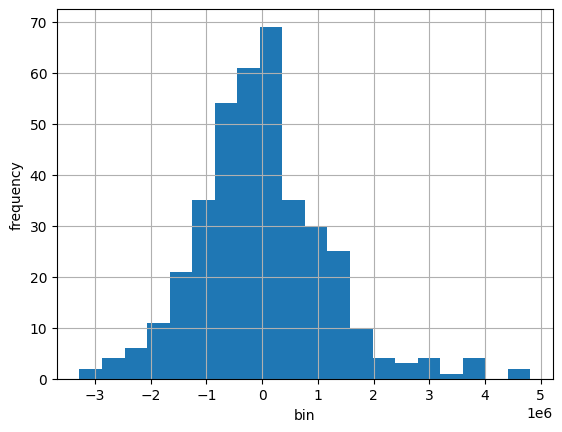

In [20]:
predictions_normal = np.matmul(X_train, w.reshape(-1,1))
print(f"Mean square error [training]: {mean_squared_error(y_train, predictions_normal)}")
print(f"R2 score [training]: {r2_score(y_train, predictions_normal)}")

# Este plot plotea el error residual, y si es normal, significa que es adecuado
residual_train = y_train - predictions_normal
plt.figure(1)
# El ancho de las columnas del histograma es dado por Sturge's Rule
plt.hist(residual_train, bins=int(1 + 3.222  * np.log(len(residual_train))))
plt.xlabel("bin")
plt.ylabel("frequency")
plt.grid(True)


x0 = np.ones((x_test.shape[0], 1))
X_test = np.hstack((x0, x_test))

predictions_normal_test = np.matmul(X_test, w.reshape(-1,1))
print(f"Mean square error [training]: {mean_squared_error(y_test, predictions_normal_test)}")
print(f"R2 score [training]: {r2_score(y_test, predictions_normal_test)}")







# Sklearn